In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [461]:
df = pd.read_csv('carprice.csv')

# Data Preprocessing

In [462]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [463]:
df.shape

(4340, 8)

In [464]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


In [465]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [466]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [468]:
df.duplicated().sum()

763

In [469]:
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3912,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
4016,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
99,Audi A4 2.0 TDI 177 Bhp Premium Plus,2013,1150000,53000,Diesel,Dealer,Automatic,First Owner
2578,Audi A4 2.0 TDI 177 Bhp Premium Plus,2013,1150000,53000,Diesel,Dealer,Automatic,First Owner
554,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
573,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
592,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
611,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
899,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
918,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner


In [470]:
# Delete duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

In [442]:
# Convert year data type to int
df['year']=df['year'].astype(int)

In [471]:
# Convert name to brand
df['name'].unique() 
df['brand'] = df['name'].str.split().str[0]
print("Brand extracted from name:")
print(df['brand'].unique())

df['brand'] = df['brand'].replace('Land', 'Land Rover')

Brand extracted from name:
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


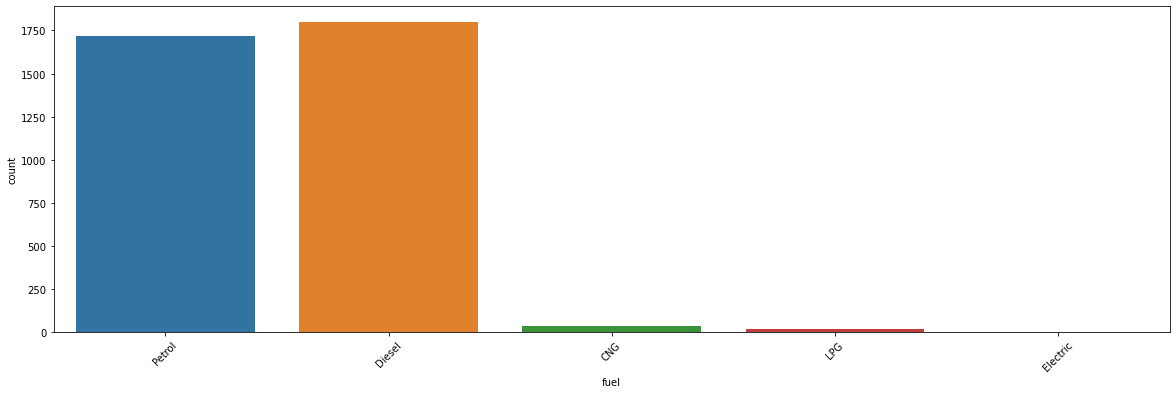

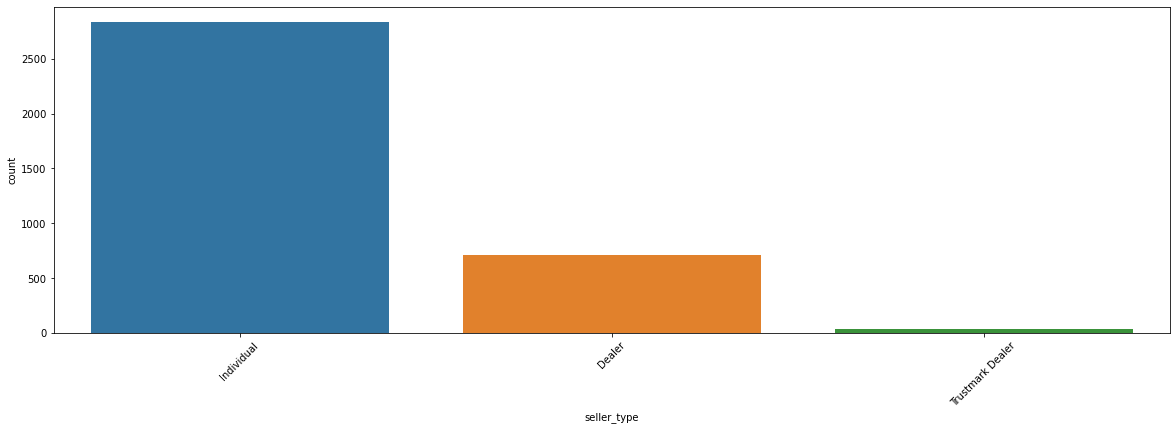

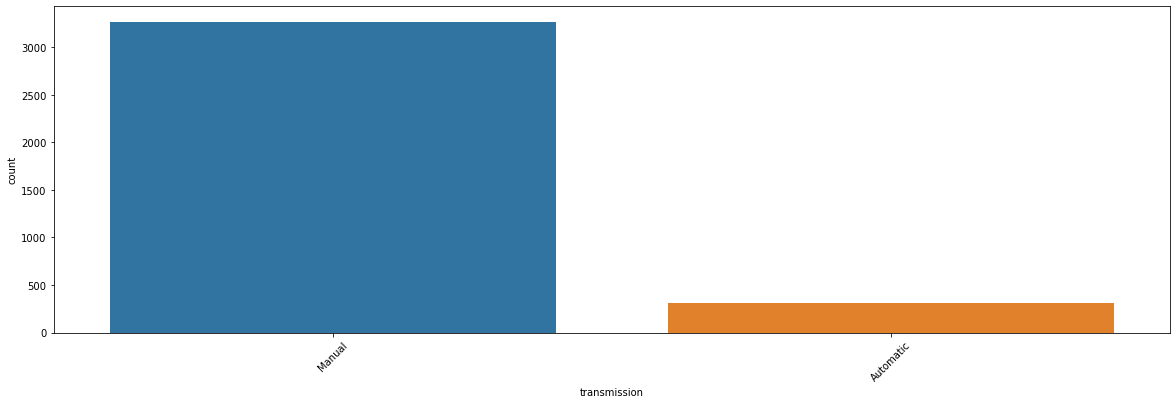

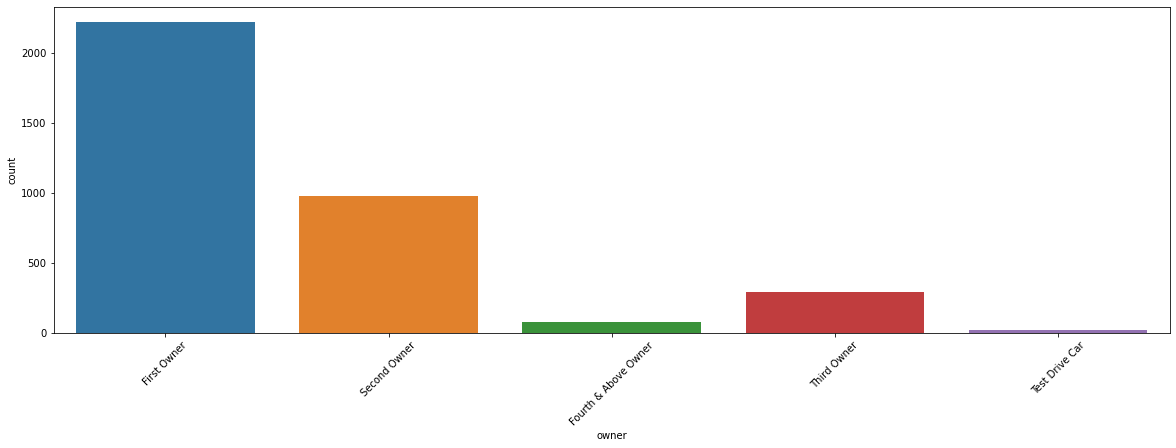

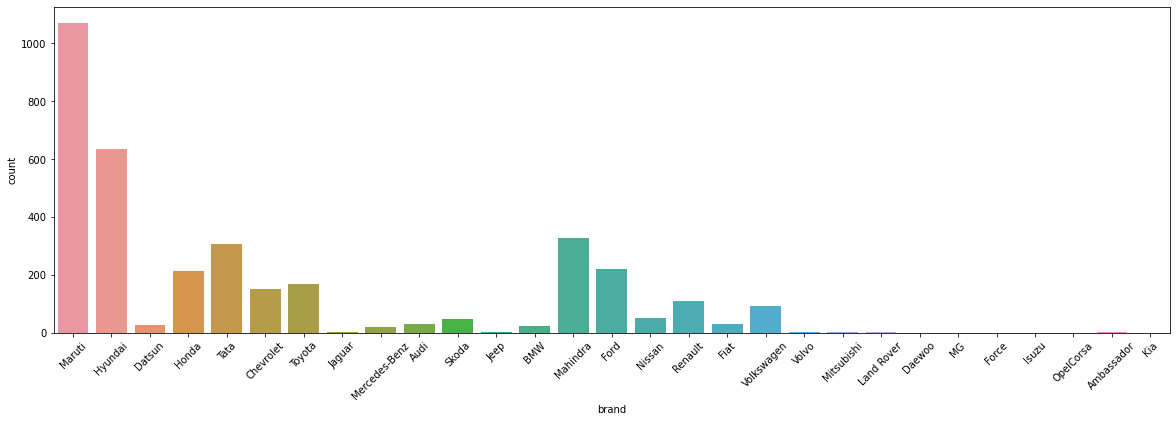

In [472]:
#Check value distribution for categorical columns
for col in df.columns:
    if col not in ['year','selling_price','name','km_driven']:
        plt.figure(figsize=(20,6))
        sns.countplot(x=col,data=df)
        plt.xticks(rotation=45)
        plt.show() 

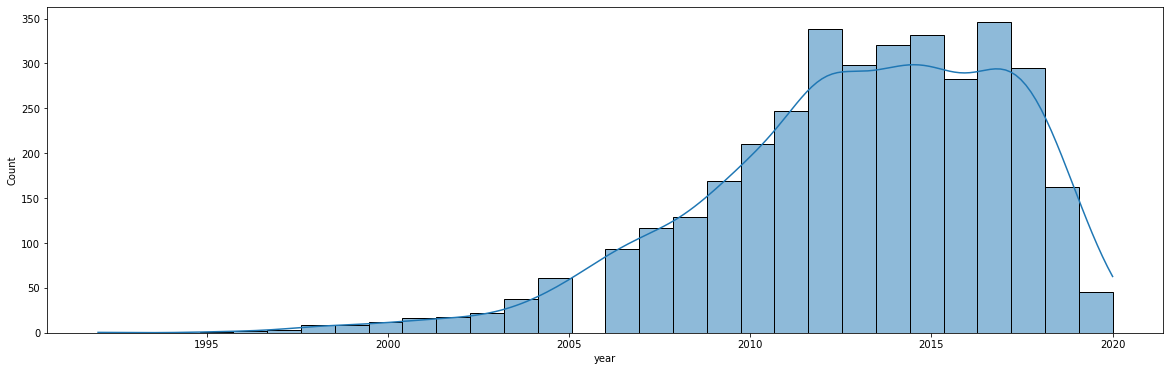

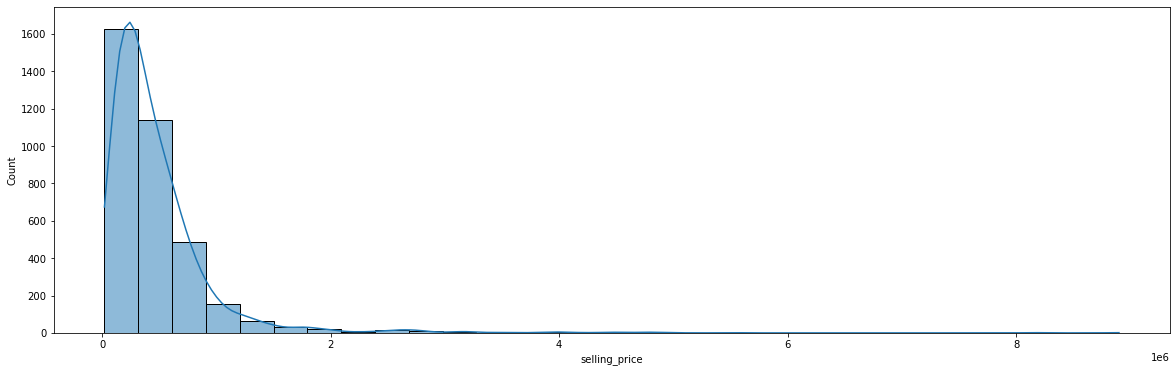

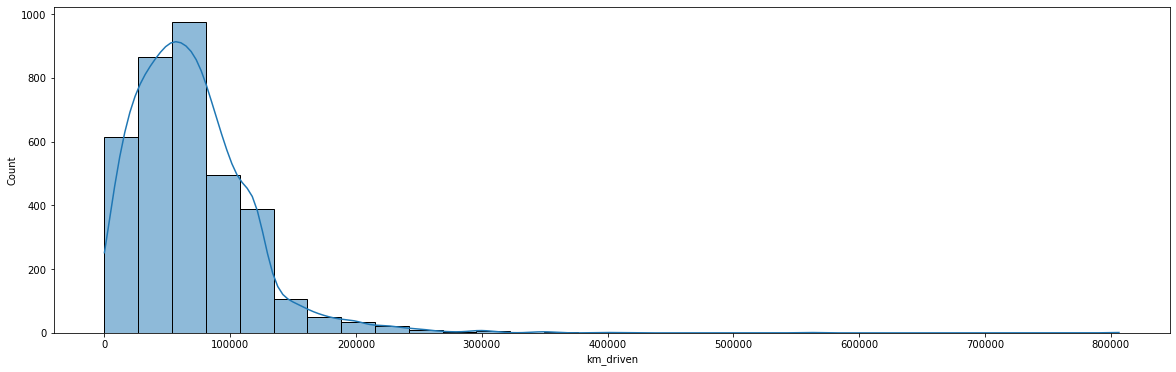

In [524]:
#Check value distribution for numerical columns
for col in df.columns:
    if col in ['year','selling_price','km_driven']:
        plt.figure(figsize=(20,6))
        df[col].sort_values(ascending=False)
        sns.histplot(df[col],bins=30, kde=True)
        plt.show() 

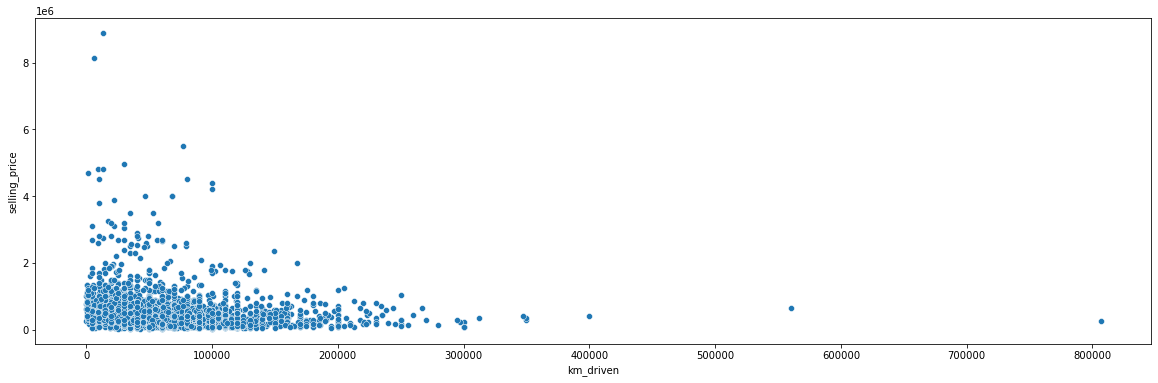

In [474]:
# Correlation analysis for km driven
plt.figure(figsize=(20,6))
sns.scatterplot(x=df['km_driven'], y=df['selling_price'])
plt.show()

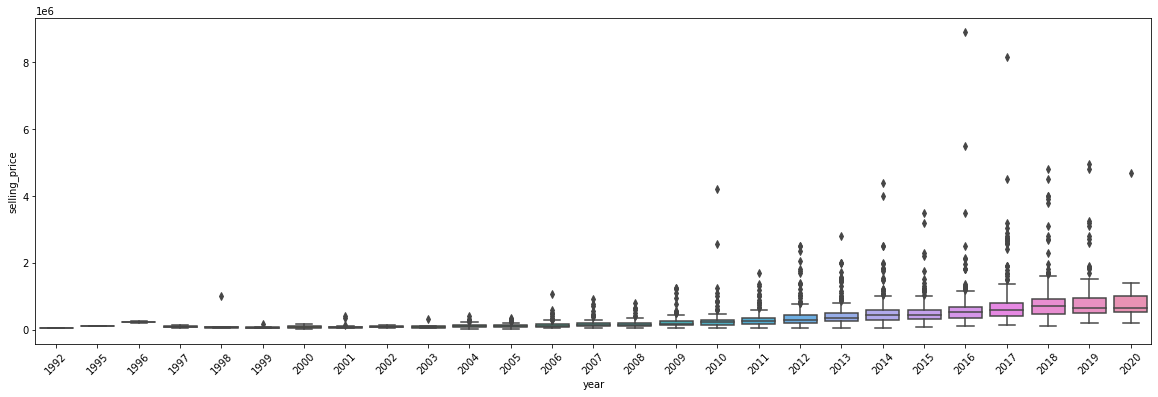

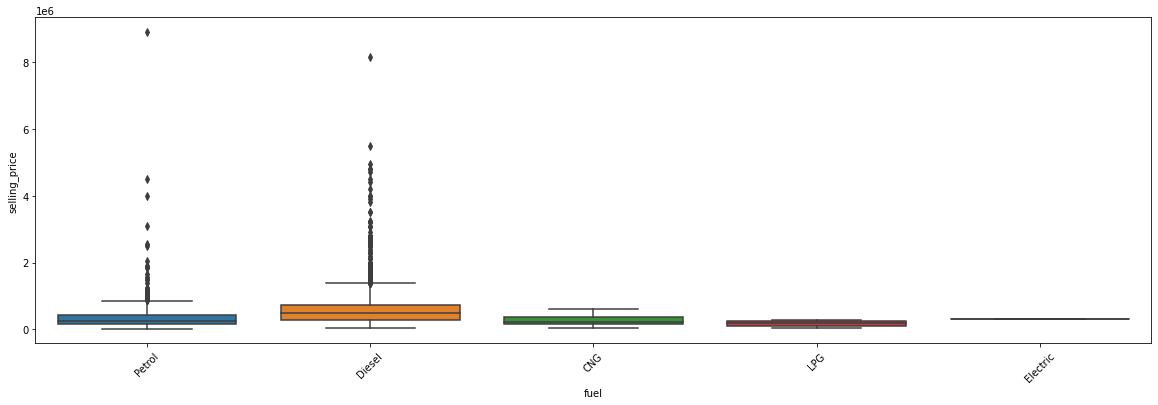

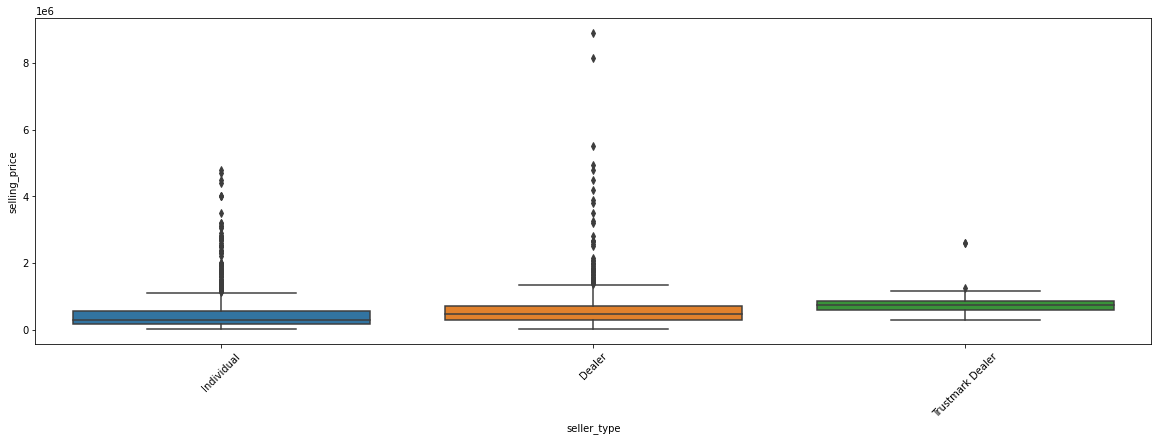

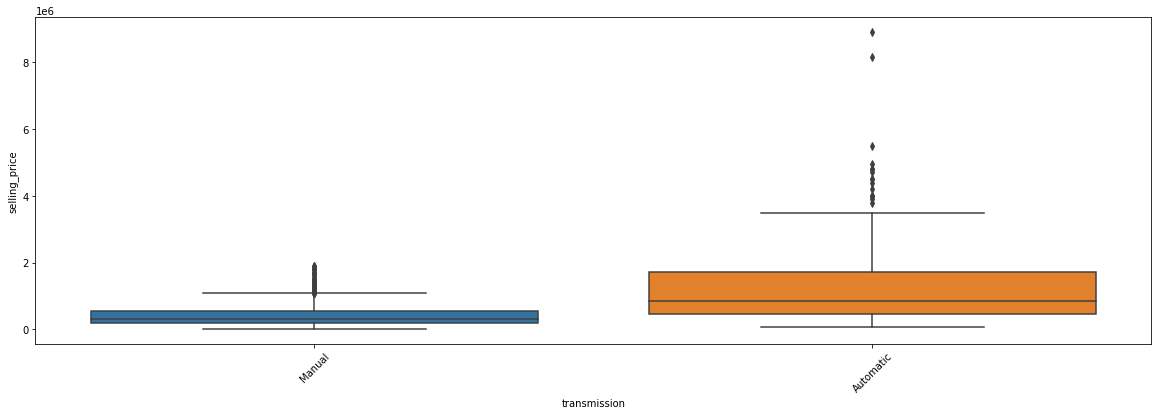

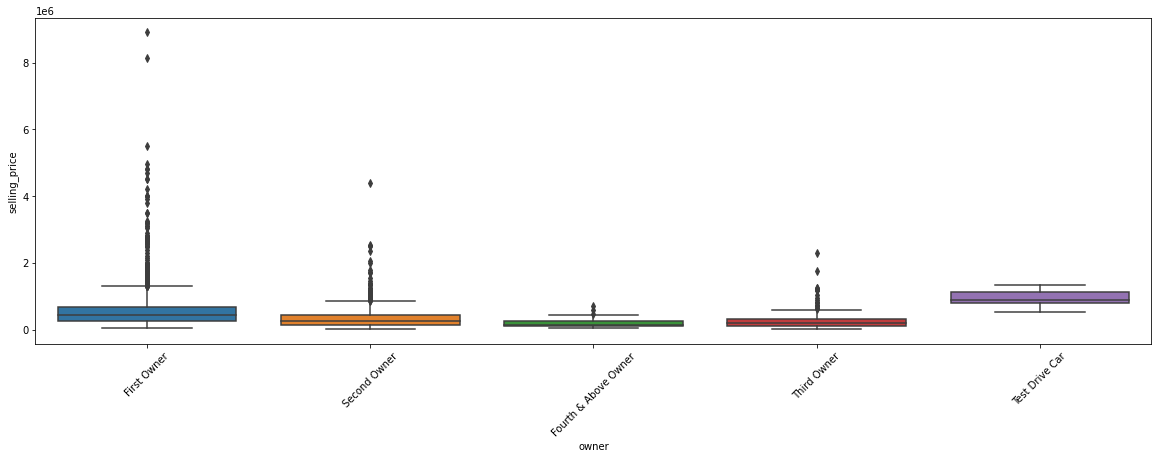

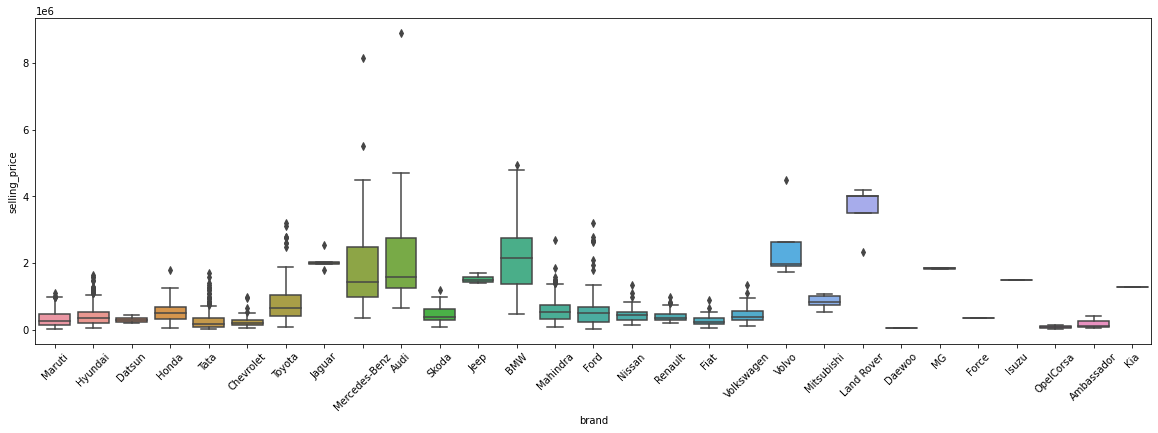

In [475]:
# Correlation analysis
for col in df.columns:
    if col not in ['selling_price','name','km_driven']:
        plt.figure(figsize=(20,6))
        sns.boxplot(x=df[col], y=df['selling_price'])
        plt.xticks(rotation=45)
        plt.show()

# Feature Engineering

In [476]:
col_to_encode = ['brand','fuel','seller_type','transmission','owner']
encoded_df = pd.get_dummies(df,columns = col_to_encode,drop_first=True)

In [477]:
encoded_df.head()

,name,year,selling_price,km_driven,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,...,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [478]:
# Convert target variable to log
encoded_df['y_log']= np.log(df['selling_price'])

In [479]:
encoded_df['year'] = encoded_df['year'].astype(int)

In [480]:
X = encoded_df.drop(columns=['selling_price', 'y_log','name'],axis=1)

In [481]:
X.head()

,year,km_driven,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,...,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
1,2007,50000,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
2,2012,100000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,2017,46000,0,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
4,2014,141000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [482]:
y=encoded_df['y_log']

In [483]:
y.head()

0    11.002100
1    11.813030
2    13.304685
3    12.429216
4    13.017003
Name: y_log, dtype: float64

In [484]:
df_excluded = encoded_df.drop(columns=['y_log','name'])
df_excluded.corr()['selling_price'].sort_values(ascending=False)

selling_price                   1.000000
year                            0.424260
brand_Audi                      0.314256
brand_BMW                       0.291420
fuel_Diesel                     0.276873
brand_Mercedes-Benz             0.275457
brand_Land Rover                0.230396
brand_Toyota                    0.160112
brand_Volvo                     0.136820
brand_Jaguar                    0.117486
brand_Mahindra                  0.069176
seller_type_Trustmark Dealer    0.066012
owner_Test Drive Car            0.065189
brand_MG                        0.063567
brand_Jeep                      0.060085
brand_Ford                      0.045101
brand_Isuzu                     0.033695
brand_Honda                     0.032872
brand_Kia                       0.027128
brand_Mitsubishi                0.027117
brand_Skoda                     0.000379
brand_Volkswagen               -0.003929
brand_Nissan                   -0.004025
brand_Force                    -0.004200
fuel_Electric   

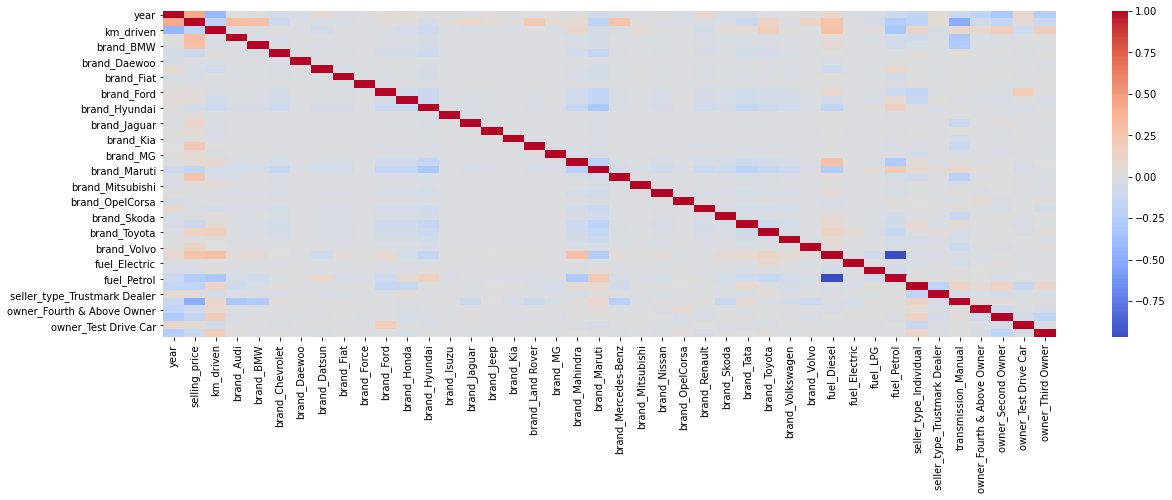

In [487]:
# Heatmap for correlations
plt.figure(figsize=(20,6))
sns.heatmap(df_excluded.corr(),cmap='coolwarm')
plt.show()

# Train Test Split

In [488]:
from sklearn.model_selection import train_test_split

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Modeling - Gradient Boosting

In [497]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [498]:
gbr = GradientBoostingRegressor(random_state=42)

In [499]:
from sklearn.model_selection import GridSearchCV

In [500]:
param_grid_gbr = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5, 10, 20],
    'max_features': ['auto','sqrt']
}

In [501]:
grid_search_gbr = GridSearchCV( 
    estimator=gbr,
    param_grid=param_grid,
    cv=5,               
    scoring='neg_mean_squared_error',  
    n_jobs=-1           
)

grid_search_gbr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error')

In [508]:
print("Best Parameters:", grid_search_gbr.best_params_)

best_model_gbr = grid_search_gbr.best_estimator_
y_pred_gbr = best_model_gbr.predict(X_test)
y_train_pred_gbr = best_model_gbr.predict(X_train)

y_test_original=np.exp(y_test)
y_pred_original_gbr=np.exp(y_pred_gbr)
y_pred_original_gbr=np.exp(y_pred_gbr)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 20, 'n_estimators': 500}


# Modeling - Ada Boosting

In [495]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [538]:
dtr = DecisionTreeRegressor()
ada = AdaBoostRegressor(base_estimator=dtr, random_state=42)

param_grid_ada = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'base_estimator__max_depth': [1, 2, 3],
    'base_estimator__min_samples_split': [2, 5, 10]
}

grid_search_ada = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

grid_search_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [1, 2, 3],
                         'base_estimator__min_samples_split': [2, 5, 10],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error')

In [539]:
print("Best Parameters:", grid_search_ada.best_params_)

best_model_ada = grid_search_ada.best_estimator_
y_pred_ada = best_model_ada.predict(X_test)
y_train_pred_ada = best_model_ada.predict(X_train)

y_pred_original_ada=np.exp(y_pred_ada)
y_pred_original_ada=np.exp(y_pred_ada)

Best Parameters: {'base_estimator__max_depth': 3, 'base_estimator__min_samples_split': 10, 'learning_rate': 0.1, 'n_estimators': 500}


# Evaluation

In [540]:
# Gradient Boosting performance
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r_gbr = r2_score(y_test, y_pred_gbr)

mse_gbr_train = mean_squared_error(y_train, y_train_pred_gbr)
rmse_gbr_train = np.sqrt(mean_squared_error(y_train, y_train_pred_gbr))
r_gbr_train = r2_score(y_train, y_train_pred_gbr)

print("Train MSE:", mse_gbr_train)
print("Train RMSE:", rmse_gbr_train)
print("Train R Squared:", r_gbr_train)
print("Test MSE:", mse_gbr)
print("Test RMSE:", rmse_gbr)
print("Test R Squared:", r_gbr)

Train MSE: 0.11042003940340465
Train RMSE: 0.332295108906834
Train R Squared: 0.8369081014268728
Test MSE: 0.13202729241379488
Test RMSE: 0.36335560049873306
Test R Squared: 0.7954320658651892


In [541]:
# Ada Boosting performance
mse_ada = mean_squared_error(y_test, y_pred_ada)
rmse_ada = np.sqrt(mean_squared_error(y_test, y_pred_ada))
r_ada = r2_score(y_test, y_pred_ada)

mse_ada_train = mean_squared_error(y_train, y_train_pred_ada)
rmse_ada_train = np.sqrt(mean_squared_error(y_train, y_train_pred_ada))
r_ada_train = r2_score(y_train, y_train_pred_ada)

print("Train MSE Ada:", mse_ada_train)
print("Train RMSE Ada:", rmse_ada_train)
print("Train R Squared Ada:", r_ada_train)
print("Test MSE Ada:", mse_ada)
print("Test RMSE Ada:", rmse_ada)
print("Test R Squared Ada:", r_ada)

Train MSE Ada: 0.21234787077882333
Train RMSE Ada: 0.46081218601380686
Train R Squared Ada: 0.6863593095021887
Test MSE Ada: 0.20635969197086143
Test RMSE Ada: 0.4542683039469752
Test R Squared Ada: 0.6802587169411327


In [542]:
# Gradient Boosting performance for original scale
mse_original_gbr = mean_squared_error(y_test_original, y_pred_original_gbr)
rmse_original_gbr = np.sqrt(mean_squared_error(y_test_original, y_pred_original_gbr))
r_original_gbr = r2_score(y_test_original, y_pred_original_gbr)
print("Test MSE (Original):", mse_original_gbr)
print("Test RMSE (Original):", rmse_original_gbr)
print("R Squared (Original):", r_original_gbr)

Test MSE (Original): 60798372889.12366
Test RMSE (Original): 246573.26069370063
R Squared (Original): 0.717137851213302


In [543]:
# Ada Boosting performance for original scale
mse_original_ada = mean_squared_error(y_test_original, y_pred_original_ada)
rmse_original_ada = np.sqrt(mean_squared_error(y_test_original, y_pred_original_ada))
r_original_ada = r2_score(y_test_original, y_pred_original_ada)
print("Test MSE (Original):", mse_original_ada)
print("Test RMSE (Original):", rmse_original_ada)
print("R Squared (Original):", r_original_ada)

Test MSE (Original): 99832134515.13202
Test RMSE (Original): 315962.23590032407
R Squared (Original): 0.5355347397468823


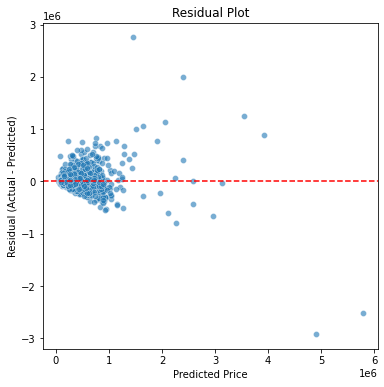

In [544]:
# Residual plot
residuals = y_test_original - y_pred_original

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_pred_original, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

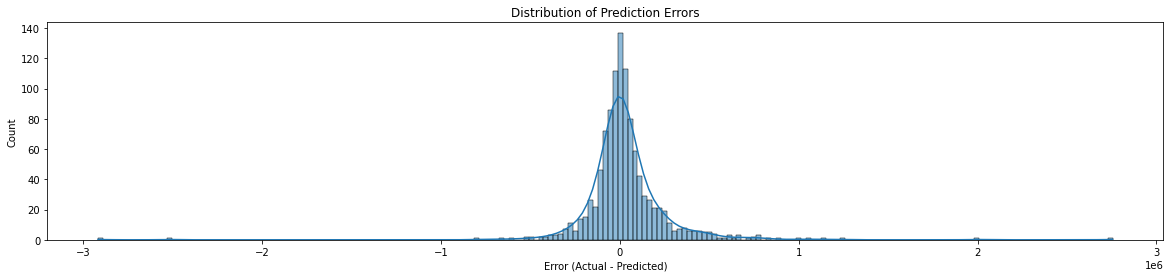

In [545]:
# Error Distribution Plot
plt.figure(figsize=(20,4))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.show()

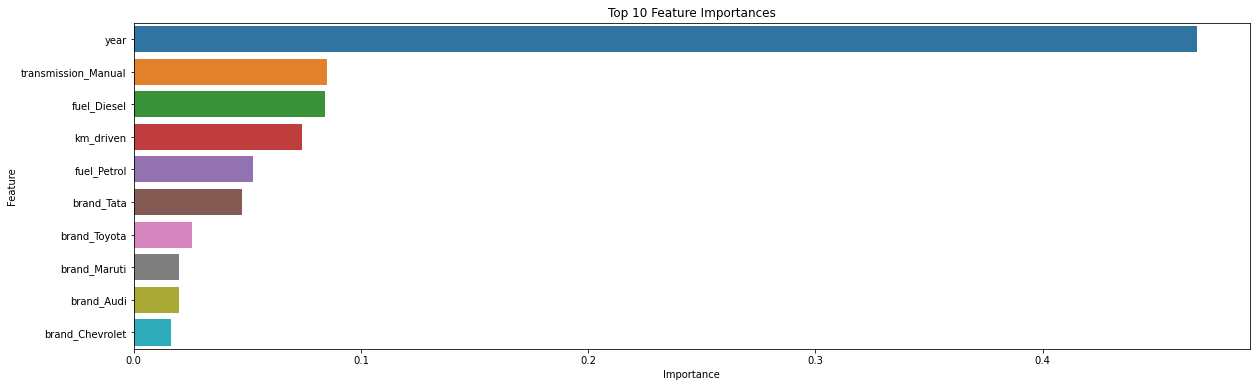

In [546]:
# Feature importance
importances = best_model.feature_importances_
features = X_train.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

top_n = 10
plt.figure(figsize=(20,6))
sns.barplot(x='Importance', y='Feature', 
            data=feat_df.head(top_n))
plt.title(f'Top {top_n} Feature Importances')
plt.show()